In [1]:
import pandas as pd
data_frame = pd.read_csv("PCA_three_clusters_data.csv")
data_frame_copy = data_frame.copy()
data_frame.head()

,x,y,z,class
0,0.647689,-0.138264,3.512299,0
1,-0.234137,-0.234153,10.769447,0
2,-0.469474,0.767435,11.166721,0
3,-0.465730,-0.463418,3.836479,0
4,-1.724918,-1.913280,1.710932,0


In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
pca = PCA(n_components=2)

pipeline = Pipeline(steps=[("scaler", scaler), ("pca", pca)])
output = pipeline.fit_transform(data_frame[["x", "y", "z"]])
output = pd.DataFrame(output)
output["class"] = data_frame["class"]

output.columns

Index([0, 1, 'class'], dtype='object')

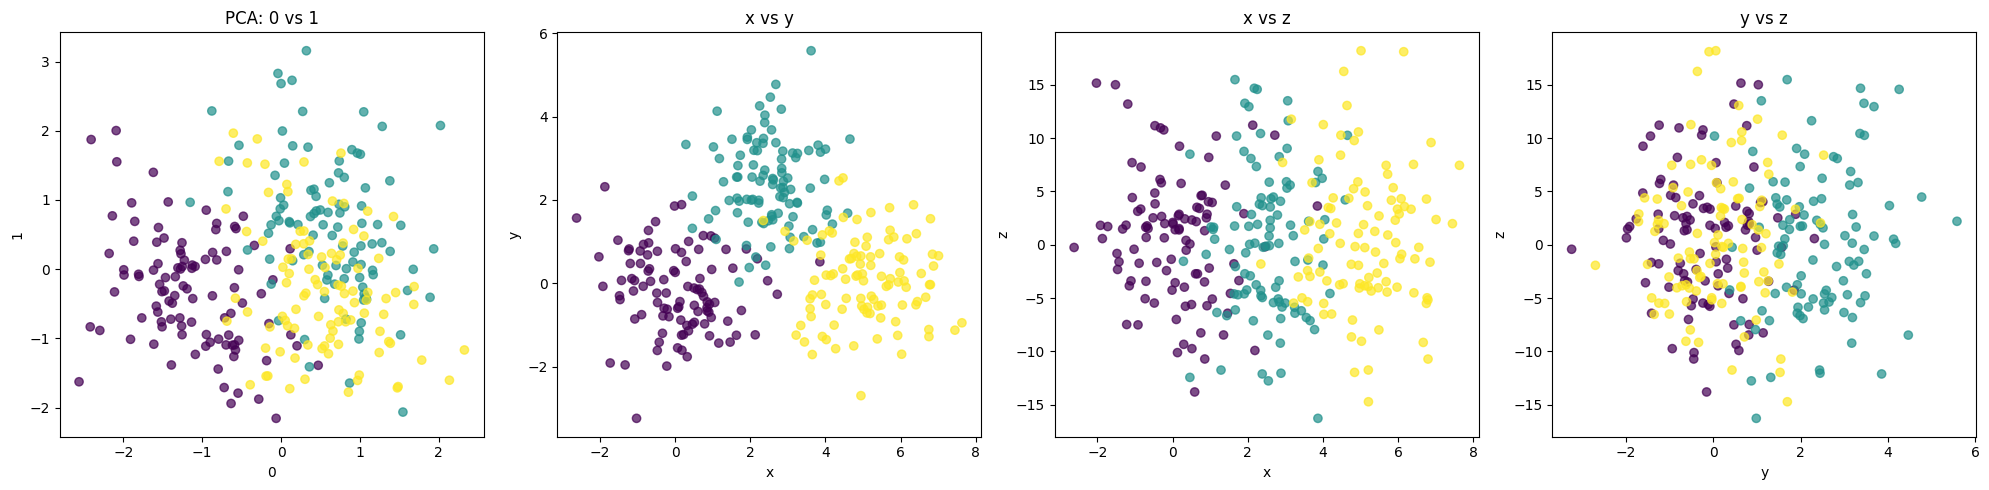

In [3]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].scatter(output[0], output[1], c=data_frame["class"], cmap='viridis', alpha=0.7)
axes[0].set_title("PCA: 0 vs 1")
axes[0].set_xlabel("0")
axes[0].set_ylabel("1")

axes[1].scatter(data_frame["x"], data_frame["y"], c=data_frame["class"], cmap='viridis', alpha=0.7)
axes[1].set_title("x vs y")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")

axes[2].scatter(data_frame["x"], data_frame["z"], c=data_frame["class"], cmap='viridis', alpha=0.7)
axes[2].set_title("x vs z")
axes[2].set_xlabel("x")
axes[2].set_ylabel("z")

axes[3].scatter(data_frame["y"], data_frame["z"], c=data_frame["class"], cmap='viridis', alpha=0.7)
axes[3].set_title("y vs z")
axes[3].set_xlabel("y")
axes[3].set_ylabel("z")

plt.tight_layout()
plt.show()


In [4]:
from sklearn.feature_selection import mutual_info_classif

chi = mutual_info_classif(data_frame_copy[["x", "y", "z"]], data_frame_copy["class"])
chi
# Jak widać zmienna z nie zawiera informacji odnośnie klasy (nie ma zależności między z a class). Dlatego, przy PCA, które bierze pod uwagę również z, dostajemy "szum", który pogarsza separacje.

array([0.77260468, 0.44875095, 0.        ])

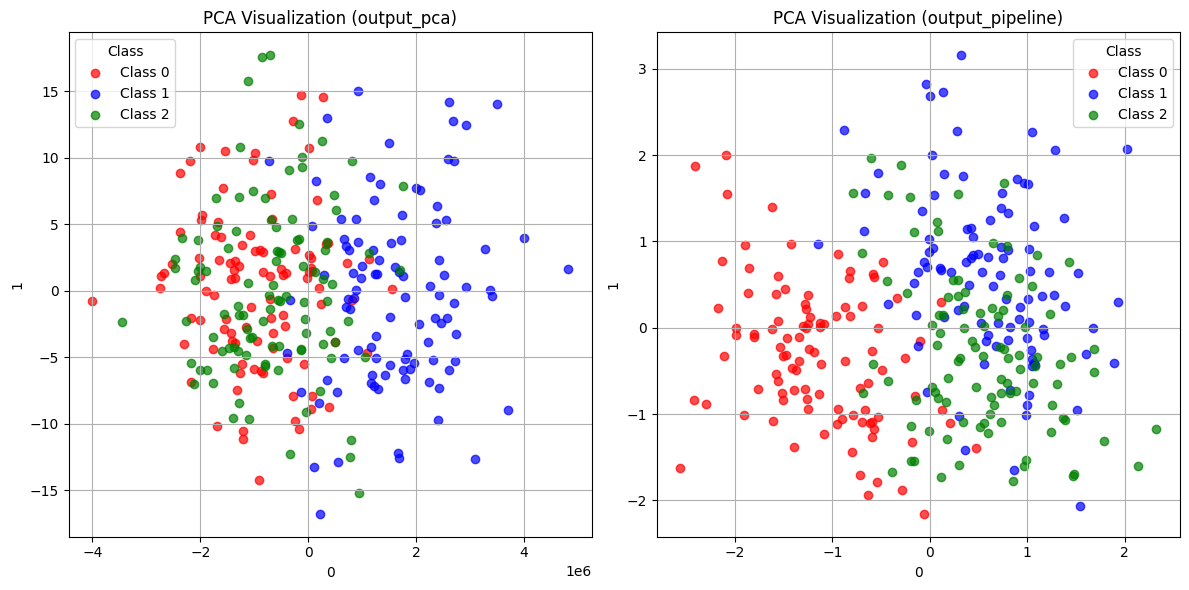

In [5]:
pca = PCA(n_components=2)
data_frame_copy["y"] *= 1e6
output_pca = pca.fit_transform(data_frame_copy[["x", "y", "z"]])
output_pca = pd.DataFrame(output_pca)
output_pca["class"] = data_frame_copy["class"]

output_pipeline = pipeline.fit_transform(data_frame_copy[["x", "y", "z"]])
output_pipeline = pd.DataFrame(output_pipeline)
output_pipeline["class"] = data_frame_copy["class"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

outputs = [output_pca, output_pipeline]
titles = ["PCA Visualization (output_pca)", "PCA Visualization (output_pipeline)"]

for i, (output, ax) in enumerate(zip(outputs, axes)):
    classes = output["class"].unique()
    colors = ["red", "blue", "green"]
    
    for j, class_label in enumerate(classes):
        subset = output[output["class"] == class_label]
        ax.scatter(subset[0], subset[1], label=f"Class {class_label}", alpha=0.7, color=colors[j % len(colors)])
    
    ax.set_title(titles[i])
    ax.set_xlabel("0")
    ax.set_ylabel("1")
    ax.legend(title="Class")
    ax.grid(True)

plt.tight_layout()
plt.show()


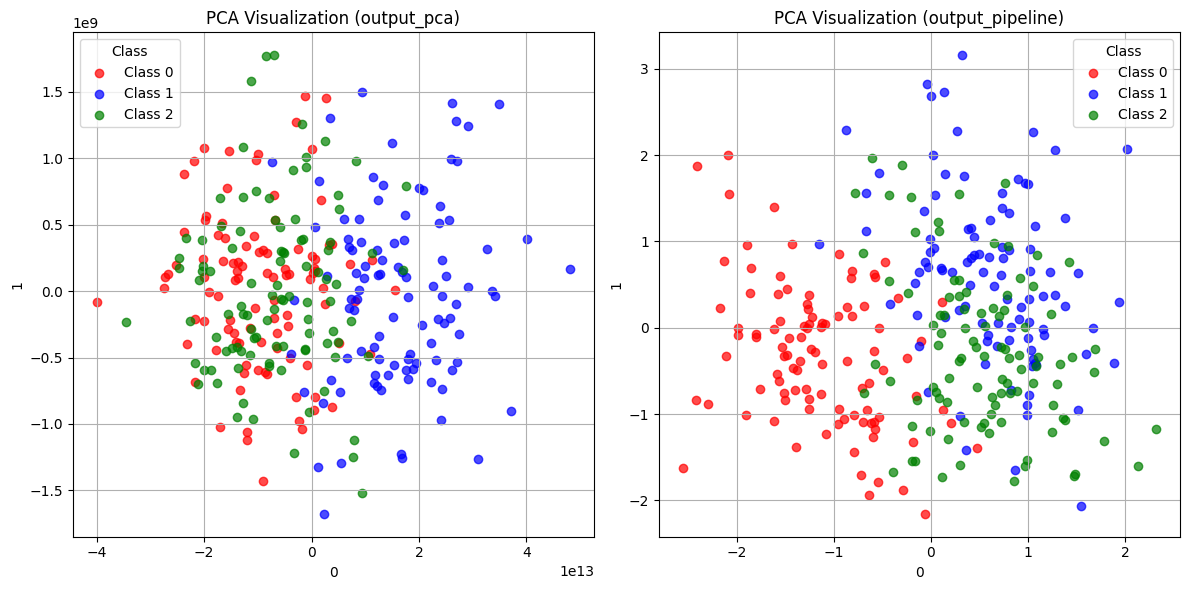

In [6]:
pca = PCA(n_components=2)
data_frame_copy["x"] *= 1e6
data_frame_copy["y"] *= 1e7
data_frame_copy["z"] *= 1e8
output_pca = pca.fit_transform(data_frame_copy[["x", "y", "z"]])
output_pca = pd.DataFrame(output_pca)
output_pca["class"] = data_frame_copy["class"]

output_pipeline = pipeline.fit_transform(data_frame_copy[["x", "y", "z"]])
output_pipeline = pd.DataFrame(output_pipeline)
output_pipeline["class"] = data_frame_copy["class"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

outputs = [output_pca, output_pipeline]
titles = ["PCA Visualization (output_pca)", "PCA Visualization (output_pipeline)"]

for i, (output, ax) in enumerate(zip(outputs, axes)):
    classes = output["class"].unique()
    colors = ["red", "blue", "green"]
    
    for j, class_label in enumerate(classes):
        subset = output[output["class"] == class_label]
        ax.scatter(subset[0], subset[1], label=f"Class {class_label}", alpha=0.7, color=colors[j % len(colors)])
    
    ax.set_title(titles[i])
    ax.set_xlabel("0")
    ax.set_ylabel("1")
    ax.legend(title="Class")
    ax.grid(True)

plt.tight_layout()
plt.show()


In [7]:
# Aby każda zmienna miała "równy" wpływ na pca potrzebyjemy skalować dane